# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

# Gerekli Verileri Import Etme


In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

from sympy import rotations
from xarray.util.generate_ops import inplace

# Veriyi Okuma

In [81]:
df = pd.read_csv("./data/veriseti_20220203_olimpiyatlar.csv", encoding="utf-8")
df.head()

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


# Veri Hakkında bilgi alma ve temizleme

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Gender  271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


# Veri Temizlemesi

In [83]:
df.columns

Index(['ID', 'Name', 'Gender', 'Age', 'Height', 'Weight', 'Team', 'NOC',
       'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [84]:
df.rename(columns={'ID': "id"}, inplace=True)

In [85]:
df.columns

Index(['id', 'Name', 'Gender', 'Age', 'Height', 'Weight', 'Team', 'NOC',
       'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

# Yararsız verilerin çıkarılması
- id bilgisi yararlı bir bilgi verilmediği için çıkarılacaktır.


In [86]:
df.drop(columns=["id", 'Games'], axis=1)  #axis = 1 Sutün
df.head(2)

,id,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


# Kayıp Veri Sorunu
- Kayıp veri ile mücadele etmek için
  1. Kayıp veriye ait örnekler veriden çıkartılabilir.
  2. Kayıp veriler asıl verinin dağılımını bozmayacak şekilde asıl verinin ortalama yada medyan değerlerine göre doldurulabilir.
- Bu veri üzerinde çalışma yapılırken
    1. Boy-kilo sutünunda bulunan kayıp veriyi etkinlik ortalamasına göre dolduracağız.
    2. yaş sutününda bulunan kayıp veriyi yaş ortalamasına göre dolduracağız.
    3. Madalya alamayan sporcuları sütundan çıkartacağız.


# Boy-Kilo alanını doldurma

In [87]:

unique_events = pd.unique(df.Event)
print(f"Unique Events : {len(unique_events)}")
unique_events[:10]


Unique Events : 765


array(["Basketball Men's Basketball", "Judo Men's Extra-Lightweight",
       "Football Men's Football", "Tug-Of-War Men's Tug-Of-War",
       "Speed Skating Women's 500 metres",
       "Speed Skating Women's 1,000 metres",
       "Cross Country Skiing Men's 10 kilometres",
       "Cross Country Skiing Men's 50 kilometres",
       "Cross Country Skiing Men's 10/15 kilometres Pursuit",
       "Cross Country Skiing Men's 4 x 10 kilometres Relay"], dtype=object)

In [88]:
# Calculate average Height and Weight for each event
height_by_event = df.groupby('Event')['Height'].transform('mean')
weight_by_event = df.groupby('Event')['Weight'].transform('mean')

# Fill NaN values in Height and Weight columns with the respective event's average
df['Height'] = df['Height'].fillna(height_by_event)
df['Weight'] = df['Weight'].fillna(weight_by_event)

# Yaş sutünündaki veriyi etkinlik bazında ortalamasına göre doldur.

In [89]:
temp_data = df.copy()

temp_data['Age'] = temp_data.groupby('Event')['Age'].transform(lambda x: x.fillna(x.mean()))
df = temp_data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Gender  271116 non-null  object 
 3   Age     270974 non-null  float64
 4   Height  269033 non-null  float64
 5   Weight  266456 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


# Sadece boş verilerin ortalama ile doldurulup doldurulmadığını kontrol etme

In [90]:
temp = df.where(df["Event"] == "Basketball Men's Basketball")
print(temp)

         id       Name Gender   Age  Height  Weight   Team  NOC        Games  \
0       1.0  A Dijiang      M  24.0   180.0    80.0  China  CHN  1992 Summer   
1       NaN        NaN    NaN   NaN     NaN     NaN    NaN  NaN          NaN   
2       NaN        NaN    NaN   NaN     NaN     NaN    NaN  NaN          NaN   
3       NaN        NaN    NaN   NaN     NaN     NaN    NaN  NaN          NaN   
4       NaN        NaN    NaN   NaN     NaN     NaN    NaN  NaN          NaN   
...     ...        ...    ...   ...     ...     ...    ...  ...          ...   
271111  NaN        NaN    NaN   NaN     NaN     NaN    NaN  NaN          NaN   
271112  NaN        NaN    NaN   NaN     NaN     NaN    NaN  NaN          NaN   
271113  NaN        NaN    NaN   NaN     NaN     NaN    NaN  NaN          NaN   
271114  NaN        NaN    NaN   NaN     NaN     NaN    NaN  NaN          NaN   
271115  NaN        NaN    NaN   NaN     NaN     NaN    NaN  NaN          NaN   

          Year  Season       City      

# Madalya alamayan Sporcuları Çıkarma

In [91]:
medal = df["Medal"]
pd.isnull(medal).sum()


231333

In [92]:
medal_filter = pd.notnull(medal)  # Null olmayanları bul
df = df[medal_filter]  #Null olmayan veriler ile tüm veriyi değiştir
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39783 entries, 3 to 271103
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      39783 non-null  int64  
 1   Name    39783 non-null  object 
 2   Gender  39783 non-null  object 
 3   Age     39690 non-null  float64
 4   Height  39044 non-null  float64
 5   Weight  38292 non-null  float64
 6   Team    39783 non-null  object 
 7   NOC     39783 non-null  object 
 8   Games   39783 non-null  object 
 9   Year    39783 non-null  int64  
 10  Season  39783 non-null  object 
 11  City    39783 non-null  object 
 12  Sport   39783 non-null  object 
 13  Event   39783 non-null  object 
 14  Medal   39783 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 4.9+ MB


In [93]:
df.head()

,id,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,182.480000,95.615385,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,15,Arvo Ossian Aaltonen,M,30.0,182.008432,76.694056,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,15,Arvo Ossian Aaltonen,M,30.0,177.000000,75.000000,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.000000,85.000000,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.000000,64.000000,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


# Veriyi Kaydetme

In [94]:
df.to_csv("./data/olimpiyatlar_clean.csv", index=False)

# Tek Değişkenli Veri analizi
 - Sayısal değişkenler
    1. Yaş
    2. Boy
    3. Kilo
    4. Yıl
  - Kategorik değişkenler
    1. İsim
    2. Cinsiyet
    3. Takım
    4. UOK
    5. Sezon
    6. Şehir
    7. Spor
    8. Etkinlik
    9. Medalya
  - Veri sıklığını anlamak için histogram çizilecek
  - Temel istatistik bilgileri kutu grafiği sayesinde yorumlanacak


In [95]:
# Öncelik olarak histogram grafikleri çizilecek bir fonksiyon yaz.
def plot_histogram(column, df=df):
    """
    Girdi: Değişken/Sutün ismi
    Çıktı: Histogram
    """
    plt.figure()
    plt.hist(df[column], bins=100, color="orange")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {column}")
    plt.show()
    print(np.mean(df[column]))

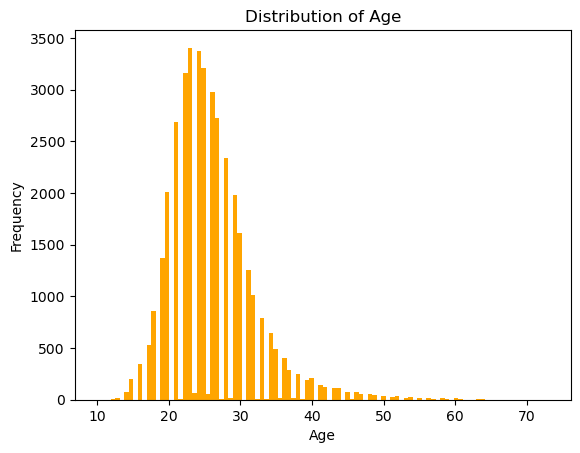

25.95965160445829


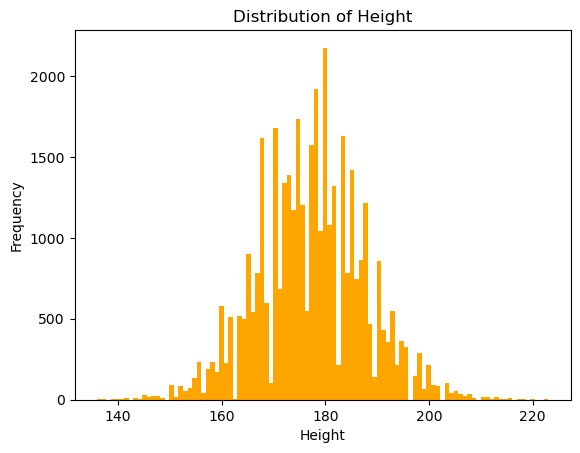

177.3744786803621


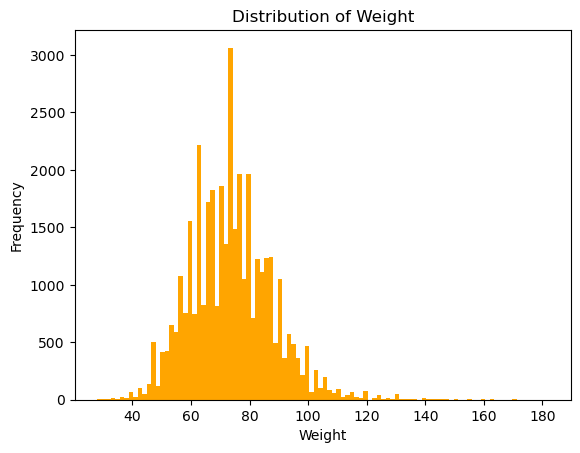

73.85659950148633


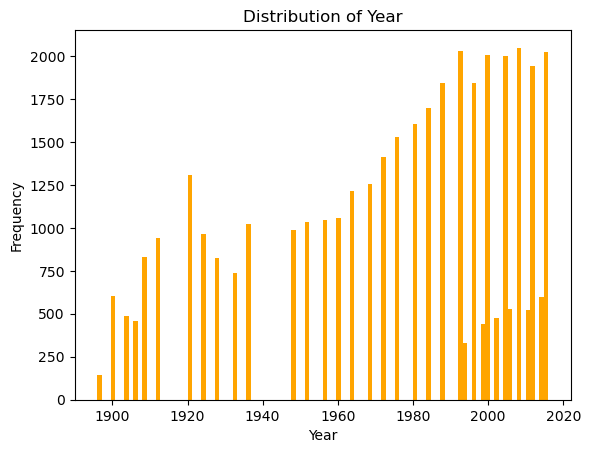

1973.943845361084


In [96]:
# Tüm sayısal değişkenler için histogramı çizdir.

numeric_variables = ["Age", "Height", "Weight", "Year"]
df = pd.read_csv("./data/olimpiyatlar_clean.csv")
for variable in numeric_variables:
    plot_histogram(variable, df)


- Beklenildiği gibi yaş kilo ve boy sutünları normal dağılıma yakın bir dağılım sözkonusu.Ancak Yaş Boy ve kilo'larda aykırılık var.
- Yıl sutününda göze çarpan ise savaş yıllarında olimpiyatların yapılmadığı ve 21.yüzyılda daha sık araklıkla olimpiyatların yapılması

- Sayısal verinin istatistik özellikleri
    1. Örnek sayısı (count)
    2. Ortalama (mean)
    3. Standart Sapma(std)
    4. Min değer (min)
    5. Max değer (max)
    6. %25  Birinci çeyrek
    7. %75  Uçüncü birinci çeyrek
    8. %50 Medyan

In [97]:
df.describe()

,id,Age,Height,Weight,Year
count,39783.000000,39690.000000,39044.000000,38292.000000,39783.000000
mean,69407.051806,25.959652,177.374479,73.856600,1973.943845
std,38849.980737,5.919261,10.262250,14.235367,33.822857
min,4.000000,10.000000,136.000000,28.000000,1896.000000
25%,36494.000000,22.000000,170.000000,64.000000,1952.000000
50%,68990.000000,25.000000,177.480339,73.086644,1984.000000
75%,103461.500000,29.000000,184.000000,82.000000,2002.000000
max,135563.000000,73.000000,223.000000,182.000000,2016.000000


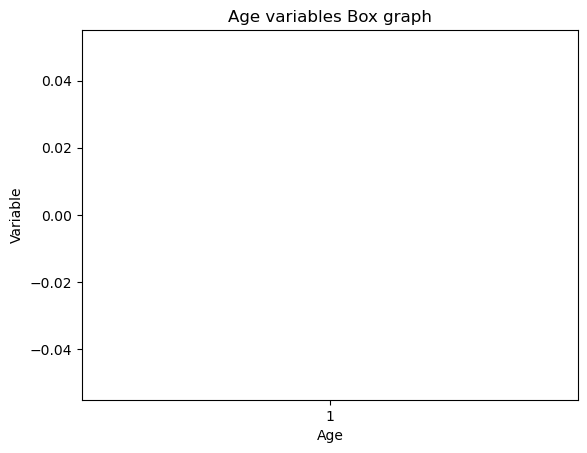

In [98]:
plt.boxplot(df.Age)
plt.title("Age variables Box graph")
plt.xlabel("Age")
plt.ylabel("Variable")
plt.show()


- 10'lu yaşlarda madalya kazanan ve 40 yaş üstü madalya kazanan aykırılıklar var.

# Kategorik değişkenler
   - Veri içeirisinde 9 adet Kategorik değişken bulunmaktadır.
        1. İsim
        2. Cinsiyet
        3. Takım
        4. UOK
        5. Sezon
        6. Şehir
        7. Spor
        8. Etkinlik
        9. Medalya
   - Kategorik değişkenleri incelemek ve yorumlamak için bar grafiği kullanılacak


In [99]:
def plot_bar(column, n=5):
    """
    :param column: sutün ismi
    :param n:Gösterilecek  En sık rastlanan eşsiz değer sayısı
    """
    data = df[column]
    data_counts = df[column].value_counts()
    data_counts = data_counts[:n]
    plt.figure()
    plt.bar(data_counts.index, data_counts, color="blue")
    plt.xticks(data_counts.index, data_counts.index.values)
    plt.xticks(rotation=45)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {column}")
    plt.show()
    print(f"{column} : {data_counts}")

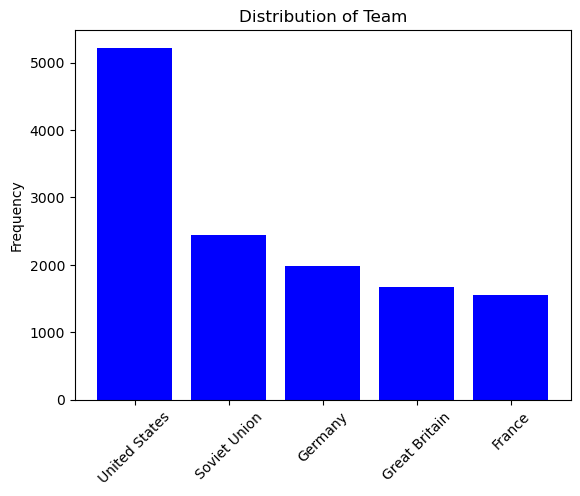

Team : Team
United States    5219
Soviet Union     2451
Germany          1984
Great Britain    1673
France           1550
Name: count, dtype: int64


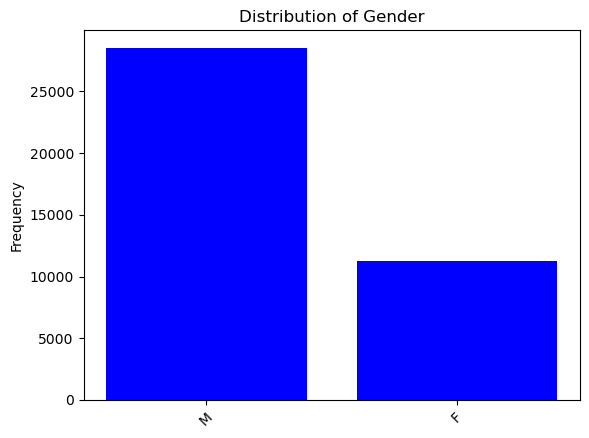

Gender : Gender
M    28530
F    11253
Name: count, dtype: int64


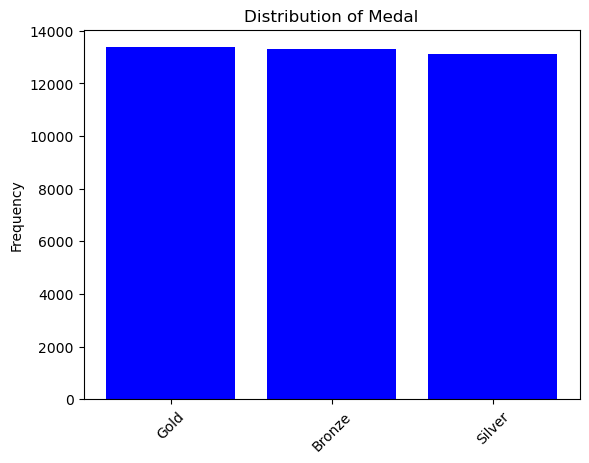

Medal : Medal
Gold      13372
Bronze    13295
Silver    13116
Name: count, dtype: int64


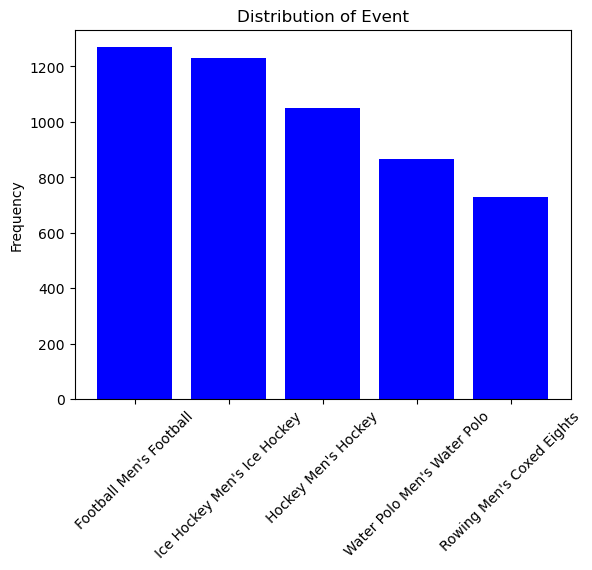

Event : Event
Football Men's Football        1269
Ice Hockey Men's Ice Hockey    1230
Hockey Men's Hockey            1050
Water Polo Men's Water Polo     866
Rowing Men's Coxed Eights       730
Name: count, dtype: int64


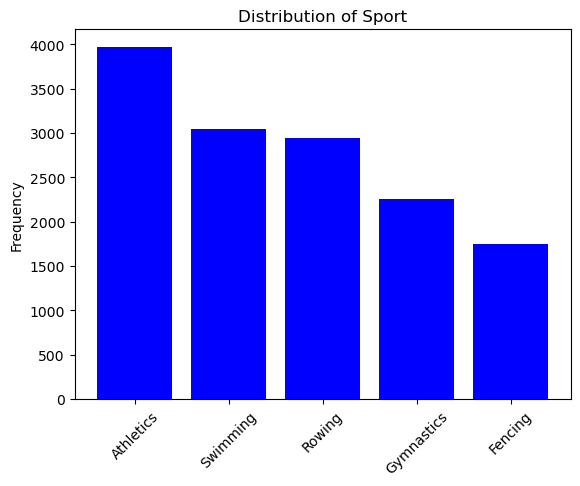

Sport : Sport
Athletics     3969
Swimming      3048
Rowing        2945
Gymnastics    2256
Fencing       1743
Name: count, dtype: int64


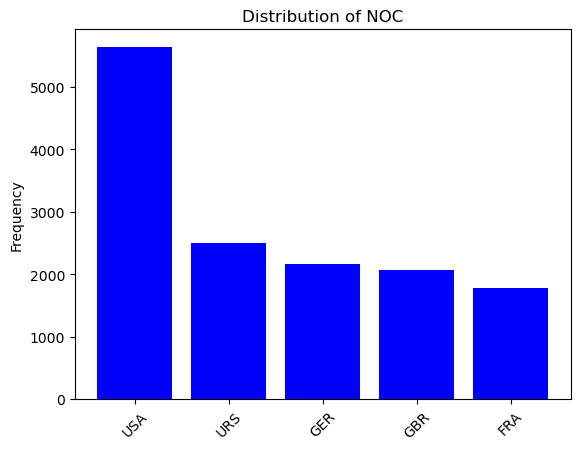

NOC : NOC
USA    5637
URS    2503
GER    2165
GBR    2068
FRA    1777
Name: count, dtype: int64


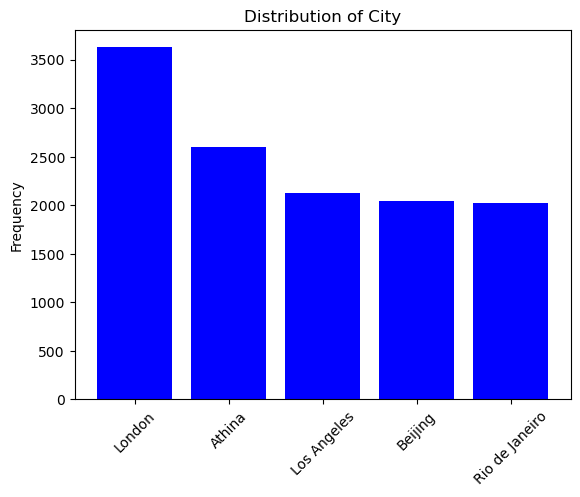

City : City
London            3624
Athina            2602
Los Angeles       2123
Beijing           2048
Rio de Janeiro    2023
Name: count, dtype: int64


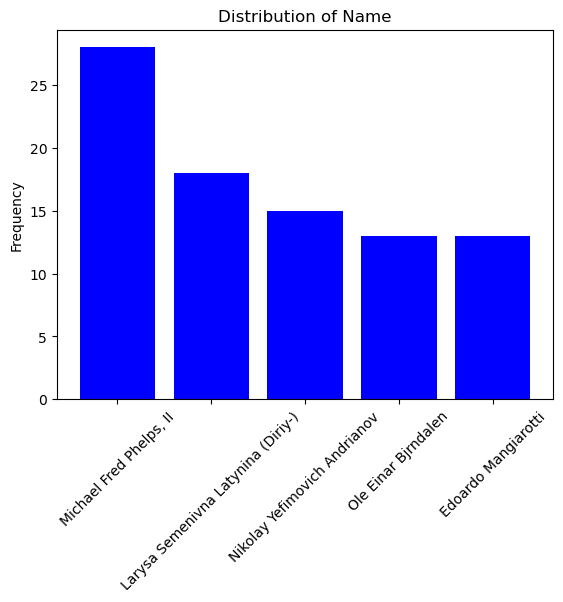

Name : Name
Michael Fred Phelps, II               28
Larysa Semenivna Latynina (Diriy-)    18
Nikolay Yefimovich Andrianov          15
Ole Einar Bjrndalen                   13
Edoardo Mangiarotti                   13
Name: count, dtype: int64


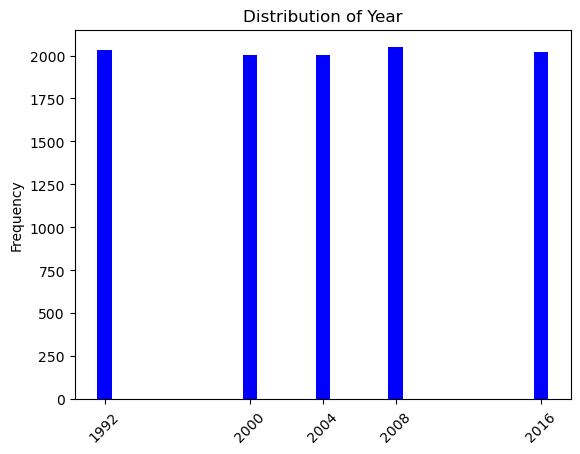

Year : Year
2008    2048
1992    2030
2016    2023
2000    2004
2004    2001
Name: count, dtype: int64


In [100]:
category_variables = {"Name", "Gender", "Team", "NOC", "Year", "City", "Sport", "Event", "Medal"}
for i in category_variables:
    plot_bar(i)

# İki değişkenli Veri Analizi
  1. Cinsiyete göre boy-kilo karşılaştırması
  2. Sayısal Sutünlar arası ilişkinin incelenmesi.
  3. Madalya ve yaş arasındaki ilişkinin incelenmesi
   4. Takımların kazandıkları altın gümüş ve bronz madalya sayıları
   5. Kazanan madalyaların hangi şehirlerde kazanıldığı
   6. Cinsiyete göre altın gümüş ve bronz madalya sayıları

# Cinsiyete göre boy-kilo karşılaştırması

In [101]:
male = df[df.Gender == "M"]
male.head(3)

,id,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,4,Edgar Lindenau Aabye,M,34.0,182.480000,95.615385,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1,15,Arvo Ossian Aaltonen,M,30.0,182.008432,76.694056,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
2,15,Arvo Ossian Aaltonen,M,30.0,177.000000,75.000000,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze


In [102]:
female = df[df["Gender"] == "F"]
female.head(3)

,id,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
17,21,Ragnhild Margrethe Aamodt,F,27.0,163.000000,68.876851,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold
19,29,Willemien Aardenburg,F,22.0,166.125267,60.530935,Netherlands,NED,1988 Summer,1988,Summer,Seoul,Hockey,Hockey Women's Hockey,Bronze
21,37,Ann Kristin Aarnes,F,23.0,182.000000,64.000000,Norway,NOR,1996 Summer,1996,Summer,Atlanta,Football,Football Women's Football,Bronze


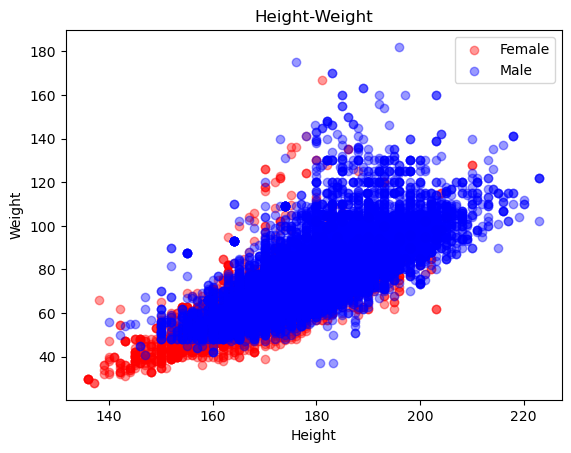

In [103]:
plt.figure()
plt.scatter(female.Height, female.Weight,alpha=0.4 ,color="red", label="Female")
plt.scatter(male.Height, male.Weight, alpha=0.4, color="blue", label="Male")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Height-Weight")
plt.legend()
plt.show()


 - Bu Grafikte boy-kilo arttıkça madalya alma oranının arttığını görüyoruz.

# Sayısal Sutünlar arası ilişkinin incelenmesi.

In [104]:
df.loc[:,["Age","Height","Weight"]].corr()  #Korelasyon matrisi

,Age,Height,Weight
Age,1.000000,0.067660,0.163839
Height,0.067660,1.000000,0.795365
Weight,0.163839,0.795365,1.000000


# Madalya yaş arasında ilişki

In [105]:
temp_data = df.copy()
temp_data = pd.get_dummies(temp_data, columns=["Medal"]) # Get dummies fonksiyonu verilen kolon içerisindeki değerlere göre farklı sutünlar oluşturur.
temp_data.head(2)

,id,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal_Bronze,Medal_Gold,Medal_Silver
0,4,Edgar Lindenau Aabye,M,34.0,182.480000,95.615385,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,False,True,False
1,15,Arvo Ossian Aaltonen,M,30.0,182.008432,76.694056,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,True,False,False


In [106]:
temp_data.loc[:,["Age","Medal_Bronze","Medal_Gold","Medal_Silver"]].corr()

,Age,Medal_Bronze,Medal_Gold,Medal_Silver
Age,1.000000,-0.006040,-0.002522,0.008594
Medal_Bronze,-0.006040,1.000000,-0.504110,-0.496859
Medal_Gold,-0.002522,-0.504110,1.000000,-0.499022
Medal_Silver,0.008594,-0.496859,-0.499022,1.000000


# Takım bazında Madalya Sayıları

In [107]:
temp_data.loc[:,["Team","Medal_Bronze","Medal_Gold","Medal_Silver"]].groupby("Team",as_index = False).sum().sort_values(by="Medal_Gold",ascending=False)

,Team,Medal_Bronze,Medal_Gold,Medal_Silver
462,United States,1233,2474,1512
403,Soviet Union,677,1058,716
165,Germany,678,679,627
215,Italy,484,535,508
171,Great Britain,572,519,582
...,...,...,...,...
230,Kerstin-1,3,0,0
226,K Division Metropolitan Police Team-3,8,0,0
224,Joy,0,0,2
220,Japan-1,0,0,2


# Kazanılan madalyanın hangi şehirlerde kazanıldığı

In [108]:
temp_data[["City","Medal_Bronze","Medal_Gold","Medal_Silver"]].groupby("City",as_index = False).sum().sort_values(by="Medal_Gold",ascending=False)

,City,Medal_Bronze,Medal_Gold,Medal_Silver
17,London,1214,1215,1195
3,Athina,860,883,859
18,Los Angeles,706,726,691
6,Beijing,710,671,667
27,Rio de Janeiro,703,665,655
38,Sydney,680,663,661
4,Atlanta,629,608,605
5,Barcelona,604,559,549
33,Seoul,549,520,513
2,Antwerpen,367,493,448


# Cinsiyete göre altın gümüş ve bronz madalya sayıları

In [109]:
temp_data[["Gender","Medal_Gold","Medal_Silver","Medal_Bronze"]].groupby("Gender",as_index = False).sum().sort_values(by="Medal_Gold",ascending=False)

,Gender,Medal_Gold,Medal_Silver,Medal_Bronze
1,M,9625,9381,9524
0,F,3747,3735,3771


# Çok değişkenli Veri Analizi

## Pivot tablosu
- Pivot tablo veritabanı,iş zekası programı yada veri tablosu gibi daha geniş bir tabloyu özetleyen istatistik tablosudur.Bu özet pivot tabloyu anlamlı bir şekilde gruplayan toplamları,ortalamaları veya diğer istatistikleri içerebilir

In [110]:
pivot_data = df.pivot_table(index = "Medal", columns="Gender",
                            values=["Age","Height","Weight"],
                            aggfunc = {"Age": ["min","max","std"],"Height":"mean", "Weight":"mean"
                                       })
pivot_data.head()

Age                                            Height              \
         max         min             std                  mean               
Gender     F     M     F     M         F         M           F           M   
Medal                                                                        
Bronze  69.0  72.0  12.0  10.0  5.333696  5.935714  169.989008  180.130340   
Gold    63.0  64.0  13.0  13.0  5.247050  6.061617  170.429033  180.470264   
Silver  55.0  73.0  11.0  13.0  5.262575  6.174631  170.222771  180.184822   

           Weight             
             mean             
Gender          F          M  
Medal                         
Bronze  62.729685  78.145543  
Gold    63.161136  78.647207  
Silver  62.839558  78.368773

- Yukarıdaki tabloda erkek ve kadın ayrımına göre madalyaların min,max,ortalama ve standart sapmalarını görebiliriz.

# Anomali Tespiti
- Aykırı değer diğer gözlemlerden önemli ölçüde farklı bir veri noktasıdır.Bir Aykırı değer ölçümdeki değişikliğe bağlı olabilir veya deneysel hatayı gösterebilir. İkincisi bazen veri kümesinden çıkartılır.Bir aykırı değer istatiksel analizlerde ciddi sorunlara neden olabilir.


In [111]:
def anomali_detection(df,property):
    outlier_indices = []

    for c in property:
        # 1. çeyrek
        Q1 = np.percentile(df[c],25)
        # 3. çeyrek
        Q3 = np.percentile(df[c],75)
        # IQR: Çeyrekler açıklığı
        IQR = Q3 - Q1
        # aykırı tespiti için çarpan
        outlier_step = IQR * 1.5
        # aykırıyı ve aykırı indeksini tespit et
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # indeksleri depola
        outlier_indices.extend(outlier_list_col)

    # eşsiz aykırı değerleri bul
    outlier_indices = Counter(outlier_indices)
    # eğer bir örnek (v) 1 farklı sütun için aykırı değerse bunu aykırı olarak kabul et (v>1)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 1)
    return multiple_outliers

In [112]:
data_anomali = df.loc[anomali_detection(df,["Age","Height","Weight"])]


,id,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal


# Zaman Serilerine göre veri Analizi
   - Yıllara göre ortalama yaş,boy,kilo değişimi
   - Yıllara göre ortalama madalya sayısı

In [121]:
data_time = df.copy()
unique_years = data_time.Year.unique()
sorted_array = np.sort(unique_years)
sorted_array

array([1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936,
       1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988,
       1992, 1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012,
       2014, 2016], dtype=int64)

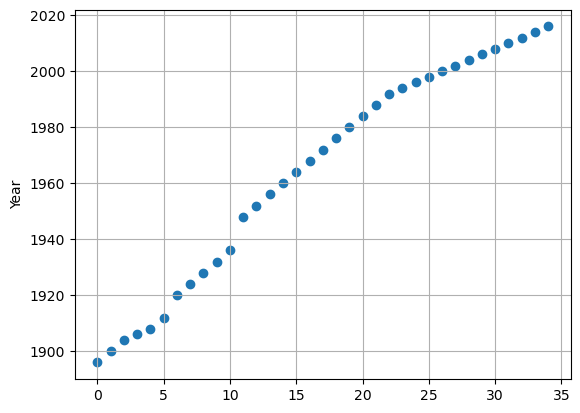

In [123]:
plt.figure()
plt.scatter(range(len(sorted_array)), sorted_array)
plt.grid(True)
plt.ylabel("Year")
plt.show()

# Veri içerisinde bulunan verileri datetime veri tipine dönüştür

In [125]:
data_time["Year"] = pd.to_datetime(data_time["Year"])
data_time

,id,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,4,Edgar Lindenau Aabye,M,34.0,182.480000,95.615385,Denmark/Sweden,DEN,1900 Summer,1970-01-01 00:00:00.000001900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1,15,Arvo Ossian Aaltonen,M,30.0,182.008432,76.694056,Finland,FIN,1920 Summer,1970-01-01 00:00:00.000001920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
2,15,Arvo Ossian Aaltonen,M,30.0,177.000000,75.000000,Finland,FIN,1920 Summer,1970-01-01 00:00:00.000001920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
3,16,Juhamatti Tapio Aaltonen,M,28.0,184.000000,85.000000,Finland,FIN,2014 Winter,1970-01-01 00:00:00.000002014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
4,17,Paavo Johannes Aaltonen,M,28.0,175.000000,64.000000,Finland,FIN,1948 Summer,1970-01-01 00:00:00.000001948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39778,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.000000,80.000000,Soviet Union,URS,1956 Summer,1970-01-01 00:00:00.000001956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver
39779,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.000000,80.000000,Soviet Union,URS,1964 Summer,1970-01-01 00:00:00.000001964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze
39780,135554,Bogusaw Zych,M,28.0,182.000000,82.000000,Poland,POL,1980 Summer,1970-01-01 00:00:00.000001980,Summer,Moskva,Fencing,"Fencing Men's Foil, Team",Bronze
39781,135563,Olesya Nikolayevna Zykina,F,19.0,171.000000,64.000000,Russia,RUS,2000 Summer,1970-01-01 00:00:00.000002000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze
